<a href="https://colab.research.google.com/github/lenlobo/shopifyDStest/blob/main/shopify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('/content/drive/MyDrive/dataset.csv')

In [4]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


Ques 1.


EDA

In [5]:
df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


As seen by the order_amount mean being 3145.128 roughly being 3145.13 as mentioned in the question we can say that there are outliers which can be seen by the max order amount being 704000. The 50% value seems to be perfect as its around the normal range of prices.

In [6]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   order_id        5000 non-null   int64 
 1   shop_id         5000 non-null   int64 
 2   user_id         5000 non-null   int64 
 3   order_amount    5000 non-null   int64 
 4   total_items     5000 non-null   int64 
 5   payment_method  5000 non-null   object
 6   created_at      5000 non-null   object
dtypes: int64(5), object(2)
memory usage: 273.6+ KB


All values are non null type, all dtypes are integers as well.
Dataset is clean no preprocessing is required as such apart from the outliers

In [15]:
df.sort_values(by='order_amount',ascending=False).head(40)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
2835,2836,42,607,704000,2000,credit_card,2017-03-28 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


We can see here the user 607, has purchased multiple times at insanely high amounts from the shop number 42. 
There are other outliers but user 607 numbers are very very high as compared to the rest.

User 607 shopping from shop 42 purchased 2000 items every time worth 70400 dollars each time and a net of (70400*17) 12 million dollars over a span of just 18 days with a credit card. This is a huge alert for fraud.

Dropping user 607 would clear out the outlier and a better calculation of the dataset would come forth

In [18]:
tmp_df = df.copy()
new_df = tmp_df[tmp_df['user_id']!=607]

In [19]:
new_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [22]:
mean_df = pd.DataFrame({'mean':new_df.groupby('user_id')['order_amount'].mean()}).reset_index()
mean_df

,user_id,mean
0,700,299.375000
1,701,397.076923
2,702,406.615385
3,703,380.687500
4,704,275.285714
...,...,...
295,995,354.400000
296,996,252.952381
297,997,2248.923077
298,998,291.111111


In [26]:
mean_df[mean_df['mean']>5000]

,user_id,mean
66,766,8007.600000
75,775,5069.625000
117,817,5061.750000
134,834,6019.000000
178,878,14266.909091
215,915,5785.142857
228,928,5041.750000
262,962,5743.428571


As you can see some users have very have spendings, lets consider user 878 and user 766.

In [28]:
df[df.user_id==878]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
818,819,60,878,354,2,debit,2017-03-27 12:42:01
927,928,2,878,94,1,credit_card,2017-03-10 18:09:05
1575,1576,47,878,290,2,cash,2017-03-07 22:06:51
1833,1834,74,878,153,1,credit_card,2017-03-06 17:33:21
2011,2012,87,878,298,2,cash,2017-03-04 14:14:35
3474,3475,20,878,254,2,cash,2017-03-17 3:43:03
3647,3648,98,878,266,2,cash,2017-03-06 1:49:57
4106,4107,26,878,176,1,debit,2017-03-20 4:32:18
4215,4216,80,878,435,3,debit,2017-03-05 3:07:32


This user spent very high amount at shop 78

In [30]:
df[df.user_id==766]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1132,1133,81,766,354,2,cash,2017-03-07 15:43:40
1278,1279,70,766,346,2,credit_card,2017-03-15 20:05:22
1464,1465,4,766,128,1,debit,2017-03-22 23:36:53
1691,1692,84,766,459,3,debit,2017-03-09 1:39:10
2115,2116,63,766,544,4,debit,2017-03-14 17:28:31
2169,2170,4,766,256,2,debit,2017-03-20 23:10:22
2936,2937,69,766,262,2,cash,2017-03-17 22:22:59
3422,3423,20,766,381,3,cash,2017-03-30 17:36:08
3724,3725,78,766,77175,3,credit_card,2017-03-16 14:13:26
3977,3978,55,766,171,1,debit,2017-03-10 9:54:00


Again, shop 78, seems fishy here.

In [31]:
df[df.shop_id==78]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


As suspected, shop 78 only has very high amount of fraudulant behavior.

To check for more shops, lets plot a graph using means of the shops

In [32]:
shop_mean_df = pd.DataFrame({'mean':new_df.groupby('shop_id')['order_amount'].mean()}).reset_index()

In [33]:
shop_mean_df

,shop_id,mean
0,1,308.818182
1,2,174.327273
2,3,305.250000
3,4,258.509804
4,5,290.311111
...,...,...
95,96,330.000000
96,97,324.000000
97,98,245.362069
98,99,339.444444


In [34]:
import seaborn as sns

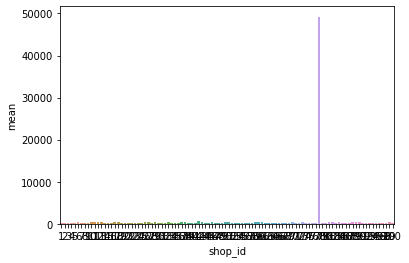

In [35]:
sns.barplot(x="shop_id", y="mean", data=shop_mean_df)

In [39]:
shop_mean_df[shop_mean_df['mean']>2000]

,shop_id,mean
77,78,49213.043478


So no other shop has suspicious activity apart from shop id 78

In [41]:
final_df = df[df['user_id']!=607]
final_df = final_df[final_df['shop_id']!=78]
final_df #Dropping user id 607 and shop id 78

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


In [42]:
final_df.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4937.000000,4937.000000,4937.000000,4937.000000,4937.000000
mean,2499.551347,49.846465,849.752279,302.580514,1.994734
std,1444.069407,29.061131,86.840313,160.804912,0.982821
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1248.000000,24.000000,775.000000,163.000000,1.000000
50%,2497.000000,50.000000,850.000000,284.000000,2.000000
75%,3751.000000,74.000000,925.000000,387.000000,3.000000
max,5000.000000,100.000000,999.000000,1760.000000,8.000000


To conclude, we had two fraudulant data parts namely outliers of user id 607 and shop 78. Removing this cleaned up the data and we got a proper mean of 302.58 which is more or less good enough with the compared spread of 284 50%.

Metric used would be mean of order amount,
and its value is 302.58

Question 2

Q1. How many orders were shipped by Speedy Express in total?

SQL Statement:

SELECT Count(OrderID) 
FROM Orders o Inner Join Shippers s

ON o.ShipperID = s.ShipperID

Where ShipperName = 'Speedy Express'

Answer = 54

Q2. What is the last name of the employee with the most orders?

SELECT LastName, MAX(NetOrders) 
FROM (Select *, COUNT(DISTINCT OrderID) as NetOrders 
FROM (SELECT o.OrderID, e.EmployeeID, e.LastName, e.FirstName 
FROM Orders o Inner Join Employees e
ON o.EmployeeID = e.EmployeeID)
GROUP BY EmployeeID
ORDER BY COUNT(DISTINCT OrderID) DESC)

Answer = Peacock 40orders

Q3. What product was ordered the most by customers in Germany?

